# **Permasalahan Bisnis**:

Sumanto seorang kredit analis sebuah Bank ABC sedang memiliki masalah karena banyaknya
nasabah yang mengalami kredit macet. Untuk mengantisipasi masalah tersebut, dia mencoba
melakukan analisis terhadap data nasabah dan status pembayaran cicilan kreditnya agar
dapat memprediksi profile debitur (penghutang) dari aspek lancar atau macet kreditnya.

# **Tujuan Bisnis**: #

Untuk memprediksi calon nasabah apakah dapat membayar kredit lancar atau macet
berdasarkan data history tahun lalu.(data terlampir)

# **Tujuan Teknis Data Science**:

Membuat model klasifikasi (decission tree atau naïve bayes) untuk memprediksi seorang
calon debitur , apakah dapat lancar membayar cicilan kredit atau tidak.

Ukuran keberhasilan pengembangan model klasifikasi sebagai berikut:
nilai accuracy, precision, recall dan F-1 score harus diatas 80%.

In [1]:
# Visual Python: Data Analysis > File
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Asesmen Data Science/creditapproval-data kotor.csv', sep=';')
df.head(10)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(df))
df

baris =  766 , Kolom (jumlah variabel) =  16
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000,1.0,345000,100,301,6000.0,1,874,875,345000,345000,0,MACET
1,x2,L,31.0,350000,7.0,55716,100,301,6000.0,1,874,875,390000,111428,0,MACET
2,x3,L,NaN,649926,6.0,108321,100,301,6000.0,1,874,875,649926,216642,0,MACET
3,x4,P,2.0,459168,NaN,38264,100,301,6000.0,1,874,875,459168,382640,0,MACET
4,x5,WANITA,34.0,3055499,8.0,"381937,41",100,301,6000.0,1,874,875,3055499,"1527749,48",0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000,16.0,70000,100,301,6000.0,2,874,0,812500,812500,97500,MACET
762,x763,P,36.0,1000000,12.0,"90833,37",100,301,6000.0,2,874,0,429000,429000,45000,MACET
763,x764,L,28.0,2000000,10.0,260000,100,301,6000.0,2,874,0,600000,600000,180000,MACET
764,x765,P,31.0,1312500,7.0,198750,100,301,6000.0,2,874,0,1312500,1312500,78750,MACET


In [2]:
# Daftar Nama Kolom
df.columns

Index(['nama_nasabah', 'jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw',
       'jml_angsuran_per_bulan', 'type_pinjaman', 'jenis_pinjaman',
       'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin',
       'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga',
       'status kredit'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    757 non-null    float64
 3   jml_pinjaman            766 non-null    object 
 4   jkw                     758 non-null    float64
 5   jml_angsuran_per_bulan  766 non-null    object 
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         766 non-null    object 
 13  tunggakan_pokok         766 non-null    object 
 14  tunggakan_bunga         766 non-null    ob

In [4]:
df.describe()

,umur,jkw,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin
count,757.000000,758.000000,766.0,766.000000,765.000000,766.000000,766.000000,766.000000
mean,29.073976,19.011873,100.0,301.197128,6013.045752,1.216710,873.968668,281.300261
std,264.552192,32.231431,0.0,0.822267,216.196305,0.412273,1.460257,408.099019
min,-7162.000000,1.000000,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000
25%,32.000000,8.000000,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000
50%,38.000000,12.000000,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000
75%,43.000000,20.000000,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000
max,1043.000000,679.000000,100.0,305.000000,9990.000000,2.000000,876.000000,875.000000


# **Alert: Data Noise**

Dilihat dari info diatas, ditemukan bahwa kolom 'jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga' bertipe data object.

Data tersebut harusnya bersifat numerik. Maka dari itu diubah dulu ke dalam bentuk 'float' atau 'int'.

In [5]:
# Salin data untuk dapat menjaga keaslian data
df_clean=df.copy()

def clean_noise(value):
    try:
        # Mengonversi nilai ke float dan menangani kesalahan dengan 'coerce'
        return pd.to_numeric(value, errors='coerce')
    except ValueError:
        return value

# Membersihkan koma dan titik dari seluruh DataFrame
columns_to_clean = ['jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']

for col in columns_to_clean:
    df_clean[col] = df_clean[col].apply(clean_noise)

df_clean.head(10)

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.0,100,301,6000.0,1,874,875,345000.0,345000.0,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.0,100,301,6000.0,1,874,875,390000.0,111428.0,0.0,MACET
2,x3,L,NaN,649926.0,6.0,108321.0,100,301,6000.0,1,874,875,649926.0,216642.0,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.0,100,301,6000.0,1,874,875,459168.0,382640.0,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,NaN,100,301,6000.0,1,874,875,3055499.0,NaN,0.0,MACET
5,x6,L,49.0,2000000.0,NaN,0.0,100,301,6000.0,1,874,875,-85000.0,0.0,0.0,LANCAR
6,x7,L,NaN,8333334.0,10.0,NaN,100,301,6000.0,1,874,875,8333334.0,NaN,0.0,MACET
7,x8,L,27.0,4435001.0,8.0,671098.0,100,301,6000.0,1,874,875,4435001.0,0.0,0.0,LANCAR
8,x9,L,NaN,560000.0,NaN,95221.0,100,301,6000.0,1,874,875,660800.0,100800.0,0.0,MACET
9,x10,LAKI-LAKI,49.0,1443750.0,15.0,107800.0,100,301,6000.0,1,874,875,1617000.0,1078000.0,0.0,MACET


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    757 non-null    float64
 3   jml_pinjaman            701 non-null    float64
 4   jkw                     758 non-null    float64
 5   jml_angsuran_per_bulan  425 non-null    float64
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         607 non-null    float64
 13  tunggakan_pokok         544 non-null    float64
 14  tunggakan_bunga         750 non-null    fl

Untuk data object sebaiknya kita ubah menjadi data kategori

In [7]:
# Lihat data yang berbentuk Objek
df_clean_objects = df_clean.copy()
df_object_variable = df_clean_objects.select_dtypes(include = ['object'])

# Lakukan looping untuk kolom pada variabel "df_objects"
for col in df_object_variable.columns:
    df_clean_objects[col] = df_clean_objects[col].astype('category')

df_clean_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            766 non-null    category
 1   jenis_kelamin           766 non-null    category
 2   umur                    757 non-null    float64 
 3   jml_pinjaman            701 non-null    float64 
 4   jkw                     758 non-null    float64 
 5   jml_angsuran_per_bulan  425 non-null    float64 
 6   type_pinjaman           766 non-null    int64   
 7   jenis_pinjaman          766 non-null    int64   
 8   bi_sektor_ekonomi       765 non-null    float64 
 9   col                     766 non-null    int64   
 10  bi_golongan_debitur     766 non-null    int64   
 11  bi_gol_penjamin         766 non-null    int64   
 12  saldo_nominatif         607 non-null    float64 
 13  tunggakan_pokok         544 non-null    float64 
 14  tunggakan_bunga         75

In [8]:
# Check Noise pada data kategorikal atau object
df_miss_val = df_clean_objects.copy()
categoric_variable = df_clean_objects.select_dtypes(include = ['object', 'category'])

for col in categoric_variable.columns:
    print(col,': ', set(df_clean_objects[col].unique()))

nama_nasabah :  {'x348', 'x705', 'x523', 'x39', 'x139', 'x121', 'x546', 'x663', 'x676', 'x40', 'x410', 'x474', 'x644', 'x259', 'x687', 'x576', 'x87', 'x285', 'x750', 'x419', 'x149', 'x669', 'x512', 'x696', 'x35', 'x156', 'x171', 'x421', 'x634', 'x709', 'x316', 'x253', 'x589', 'x36', 'x77', 'x199', 'x657', 'x483', 'x306', 'x630', 'x8', 'x234', 'x11', 'x393', 'x563', 'x103', 'x403', 'x489', 'x667', 'x577', 'x727', 'x127', 'x219', 'x221', 'x409', 'x567', 'x753', 'x135', 'x292', 'x720', 'x29', 'x492', 'x328', 'x736', 'x581', 'x284', 'x688', 'x167', 'x422', 'x269', 'x99', 'x240', 'x236', 'x43', 'x395', 'x142', 'x514', 'x186', 'x617', 'x484', 'x682', 'x143', 'x762', 'x627', 'x640', 'x649', 'x12', 'x575', 'x612', 'x511', 'x658', 'x66', 'x700', 'x718', 'x245', 'x734', 'x32', 'x560', 'x343', 'x517', 'x1', 'x86', 'x545', 'x542', 'x222', 'x487', 'x64', 'x50', 'x322', 'x189', 'x551', 'x303', 'x58', 'x329', 'x494', 'x464', 'x607', 'x588', 'x7', 'x425', 'x298', 'x177', 'x493', 'x144', 'x715', 'x763'

In [9]:
# Mengonversi jenis kelamin
df_miss_val['jenis_kelamin'] = df_miss_val['jenis_kelamin'].replace(to_replace=["PRIA", "WANITA", 'LAKI-LAKI', 'PEREMPUAN'],
                                                                    value=["L", "P", "L", "P"])
for col in categoric_variable.columns:
  print(col,': ', set(df_miss_val[col].unique()))

nama_nasabah :  {'x348', 'x705', 'x523', 'x39', 'x139', 'x121', 'x546', 'x663', 'x676', 'x40', 'x410', 'x474', 'x644', 'x259', 'x687', 'x576', 'x87', 'x285', 'x750', 'x419', 'x149', 'x669', 'x512', 'x696', 'x35', 'x156', 'x171', 'x421', 'x634', 'x709', 'x316', 'x253', 'x589', 'x36', 'x77', 'x199', 'x657', 'x483', 'x306', 'x630', 'x8', 'x234', 'x11', 'x393', 'x563', 'x103', 'x403', 'x489', 'x667', 'x577', 'x727', 'x127', 'x219', 'x221', 'x409', 'x567', 'x753', 'x135', 'x292', 'x720', 'x29', 'x492', 'x328', 'x736', 'x581', 'x284', 'x688', 'x167', 'x422', 'x269', 'x99', 'x240', 'x236', 'x43', 'x395', 'x142', 'x514', 'x186', 'x617', 'x484', 'x682', 'x143', 'x762', 'x627', 'x640', 'x649', 'x12', 'x575', 'x612', 'x511', 'x658', 'x66', 'x700', 'x718', 'x245', 'x734', 'x32', 'x560', 'x343', 'x517', 'x1', 'x86', 'x545', 'x542', 'x222', 'x487', 'x64', 'x50', 'x322', 'x189', 'x551', 'x303', 'x58', 'x329', 'x494', 'x464', 'x607', 'x588', 'x7', 'x425', 'x298', 'x177', 'x493', 'x144', 'x715', 'x763'

In [10]:
df_miss_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            766 non-null    category
 1   jenis_kelamin           766 non-null    category
 2   umur                    757 non-null    float64 
 3   jml_pinjaman            701 non-null    float64 
 4   jkw                     758 non-null    float64 
 5   jml_angsuran_per_bulan  425 non-null    float64 
 6   type_pinjaman           766 non-null    int64   
 7   jenis_pinjaman          766 non-null    int64   
 8   bi_sektor_ekonomi       765 non-null    float64 
 9   col                     766 non-null    int64   
 10  bi_golongan_debitur     766 non-null    int64   
 11  bi_gol_penjamin         766 non-null    int64   
 12  saldo_nominatif         607 non-null    float64 
 13  tunggakan_pokok         544 non-null    float64 
 14  tunggakan_bunga         75

# Remove Missing Value

In [11]:
df_miss_val.isnull().sum()

nama_nasabah                0
jenis_kelamin               0
umur                        9
jml_pinjaman               65
jkw                         8
jml_angsuran_per_bulan    341
type_pinjaman               0
jenis_pinjaman              0
bi_sektor_ekonomi           1
col                         0
bi_golongan_debitur         0
bi_gol_penjamin             0
saldo_nominatif           159
tunggakan_pokok           222
tunggakan_bunga            16
status kredit               0
dtype: int64

In [12]:
df_miss_val_drop=df_miss_val.copy()

# Drop missing values in the 'umur' column
df_miss_val_drop = df_miss_val_drop.dropna(subset=['umur','jkw', 'bi_sektor_ekonomi', 'tunggakan_bunga'])

print("Ukuran setelah di drop missing value:\n",df_miss_val_drop.shape)
df_miss_val_drop.head()

Ukuran setelah di drop missing value:
 (738, 16)


,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.0,100,301,6000.0,1,874,875,345000.0,345000.0,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.0,100,301,6000.0,1,874,875,390000.0,111428.0,0.0,MACET
4,x5,P,34.0,3055499.0,8.0,NaN,100,301,6000.0,1,874,875,3055499.0,NaN,0.0,MACET
7,x8,L,27.0,4435001.0,8.0,671098.0,100,301,6000.0,1,874,875,4435001.0,0.0,0.0,LANCAR
9,x10,L,49.0,1443750.0,15.0,107800.0,100,301,6000.0,1,874,875,1617000.0,1078000.0,0.0,MACET


In [13]:
df_miss_val_drop.isnull().sum()

nama_nasabah                0
jenis_kelamin               0
umur                        0
jml_pinjaman               58
jkw                         0
jml_angsuran_per_bulan    322
type_pinjaman               0
jenis_pinjaman              0
bi_sektor_ekonomi           0
col                         0
bi_golongan_debitur         0
bi_gol_penjamin             0
saldo_nominatif           147
tunggakan_pokok           207
tunggakan_bunga             0
status kredit               0
dtype: int64

Dalam pendeskripsian di atas, umur memiliki nilai 'anomali'. Ada baiknya dibersihkan

In [14]:
# Jadikan sebagai nilai int terlebih dahulu
df_miss_val_drop['umur'] = df_miss_val_drop['umur'].astype('int64')
df_miss_val_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            738 non-null    category
 1   jenis_kelamin           738 non-null    category
 2   umur                    738 non-null    int64   
 3   jml_pinjaman            680 non-null    float64 
 4   jkw                     738 non-null    float64 
 5   jml_angsuran_per_bulan  416 non-null    float64 
 6   type_pinjaman           738 non-null    int64   
 7   jenis_pinjaman          738 non-null    int64   
 8   bi_sektor_ekonomi       738 non-null    float64 
 9   col                     738 non-null    int64   
 10  bi_golongan_debitur     738 non-null    int64   
 11  bi_gol_penjamin         738 non-null    int64   
 12  saldo_nominatif         591 non-null    float64 
 13  tunggakan_pokok         531 non-null    float64 
 14  tunggakan_bunga         73

In [15]:
print("Data unik dalam umur:\n", df_miss_val_drop['umur'].unique())

Data unik dalam umur:
 [   40    31    34    27    49    42    26    55    38    41    35     2
    39    50    57    36    58    43    44    52    46    28    47    32
    48    45    30    67    29    37    25    21    33    23    19     3
    53    51     0    54    61   -42     1    24    56   -48    68  1043
    60   -49    76    22    80 -7162   -47    65   -44    64]


Terlihat bahwasannya data memiliki anomali. Sebaiknya tangani hal ini.

In [16]:
import numpy as np

import numpy as np

def clean_umur(column):
    # Replace specified values with NaN
    column = column.replace([1043, -7162, 2, 1, 0, 3], np.nan)

    # Take the absolute value
    column = column.abs()

    return column

# Apply the clean_umur function to the 'umur' column
df_miss_val_drop['umur'] = clean_umur(df_miss_val_drop['umur'])

# Check the updated DataFrame
print("Updated dataframe:\n", df_miss_val_drop['umur'])

Updated dataframe:
 0      40.0
1      31.0
4      34.0
7      27.0
9      49.0
       ... 
761    38.0
762    36.0
763    28.0
764    31.0
765    36.0
Name: umur, Length: 738, dtype: float64


**Visualize the data**

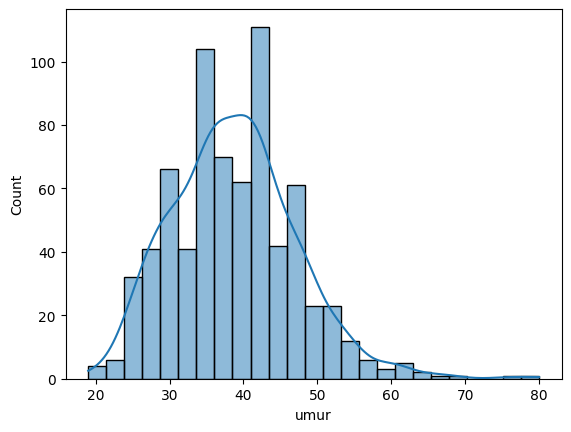

In [17]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.histplot(data=df_miss_val_drop, x='umur', kde=True)
plt.show()

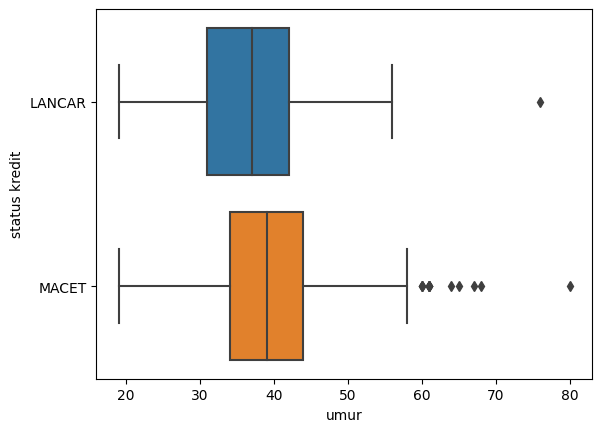

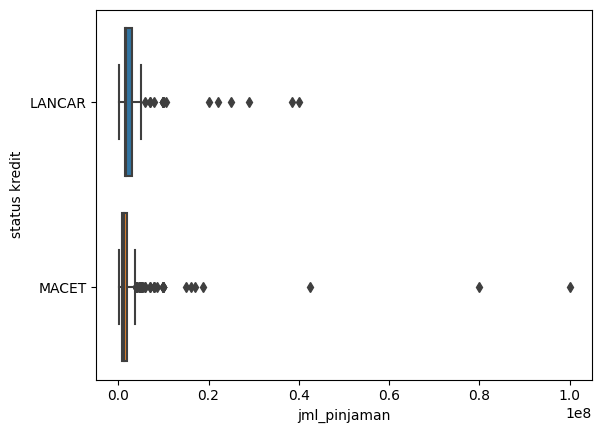

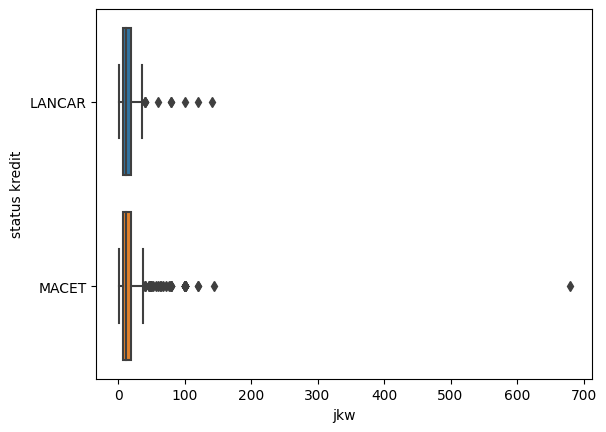

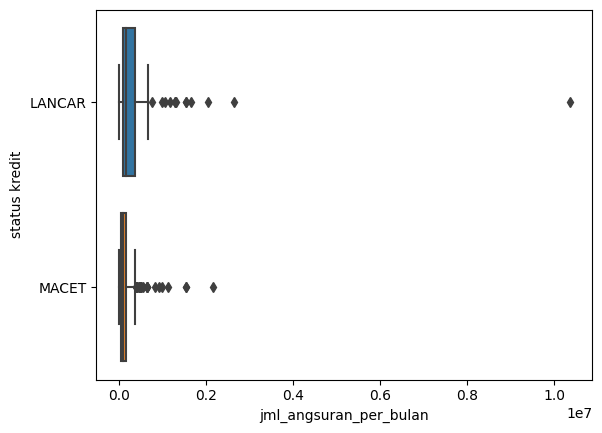

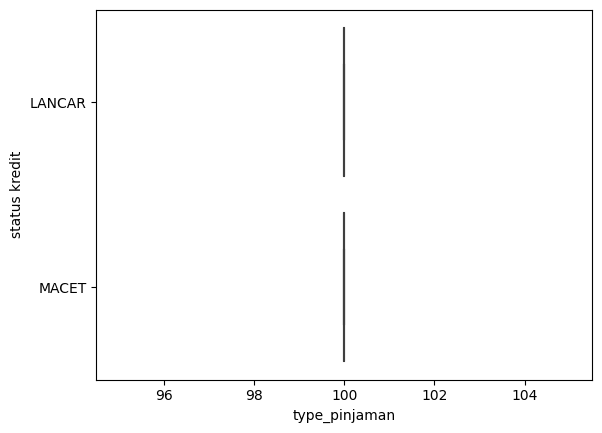

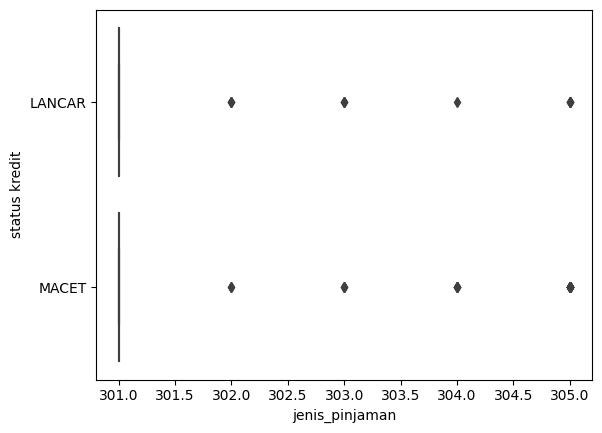

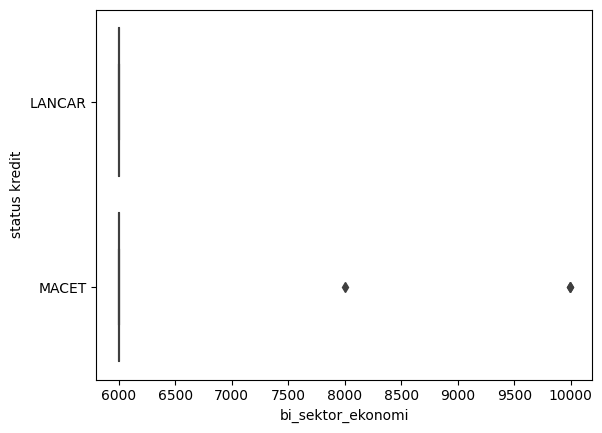

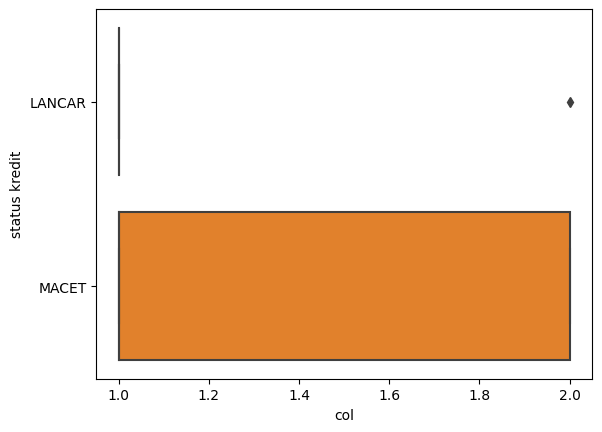

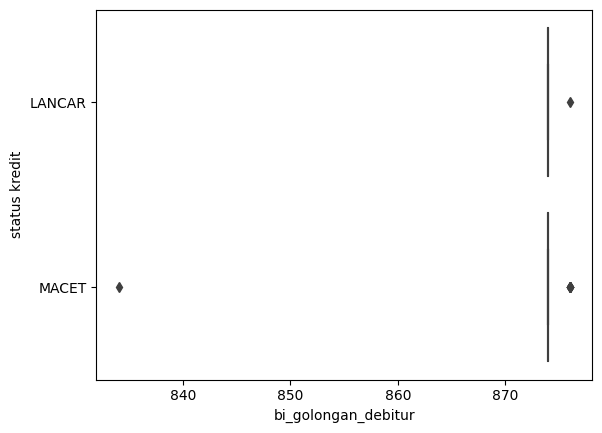

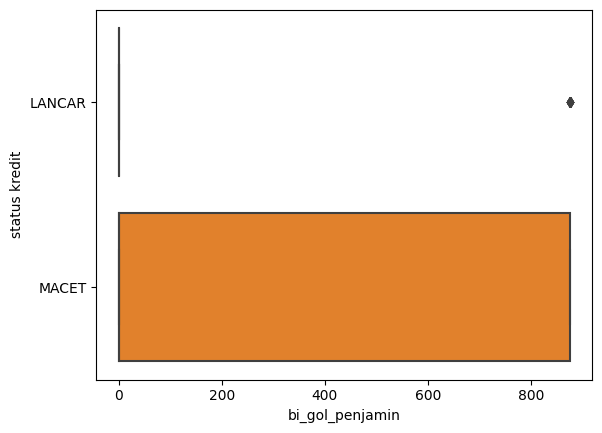

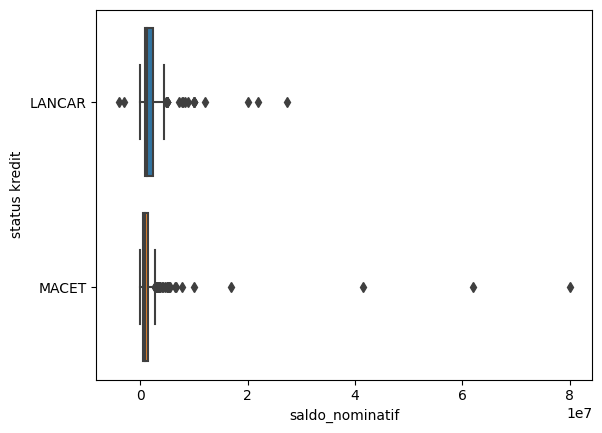

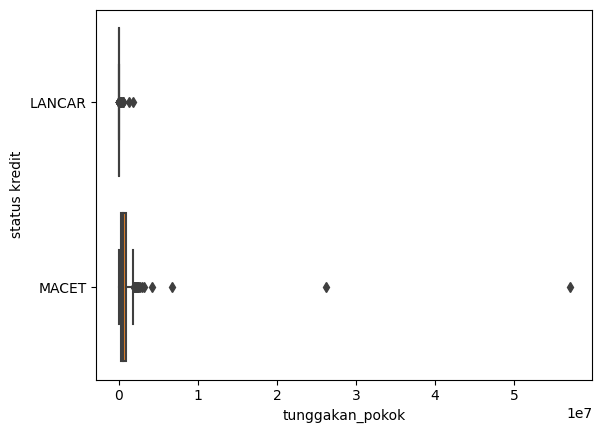

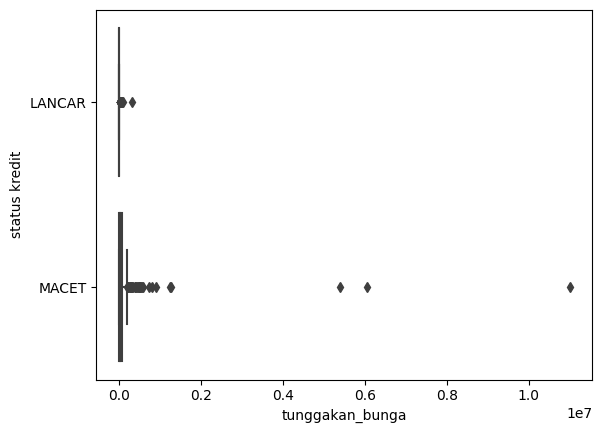

In [18]:
# Visual Python: Visualization > Seaborn
intVar = df_miss_val_drop.select_dtypes(include = ['int64', 'float64'])
for col in intVar.columns:
    p = sns.boxplot(x=col, y="status kredit", data=df_miss_val_drop)
    plt.show()

Bisa dilihat bahwasannya ada beberapa data yang sebenarnya bisa kita hapus

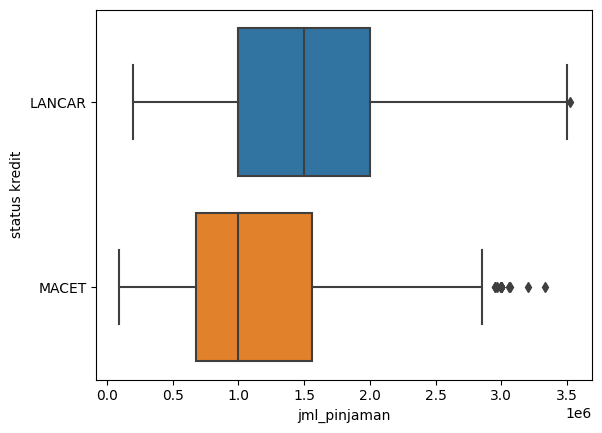

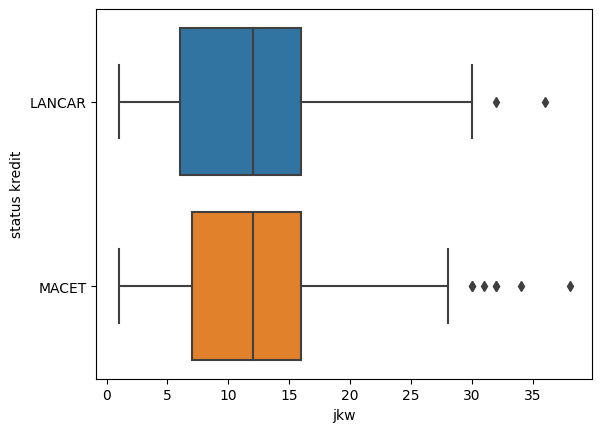

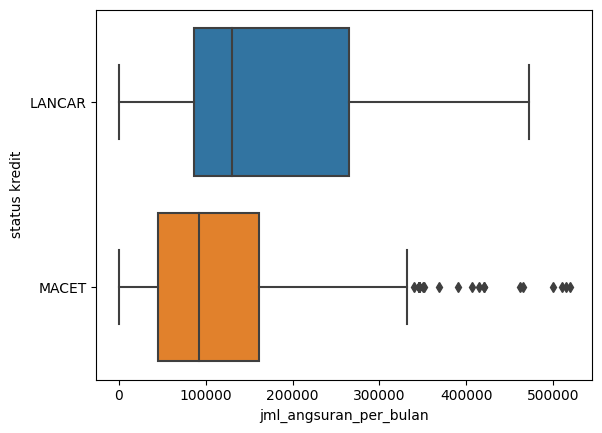

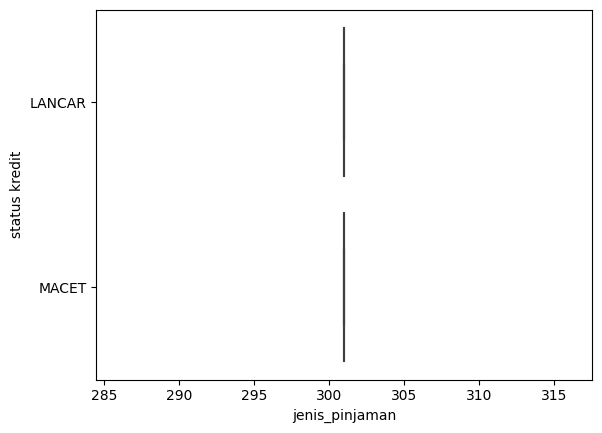

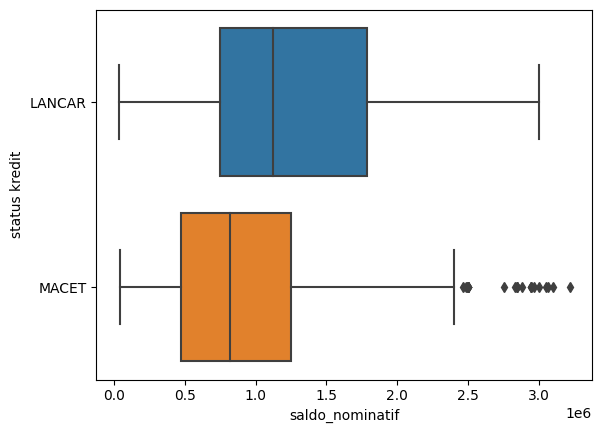

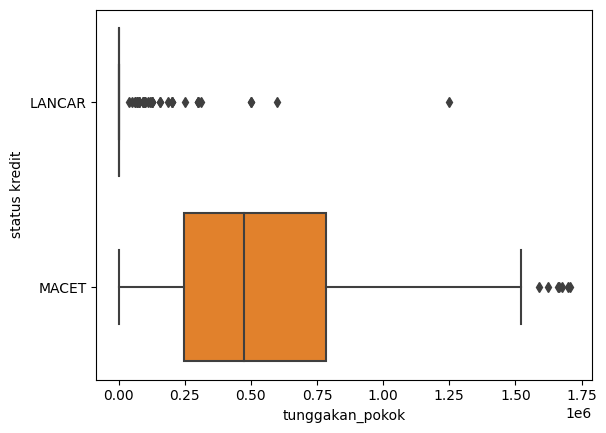

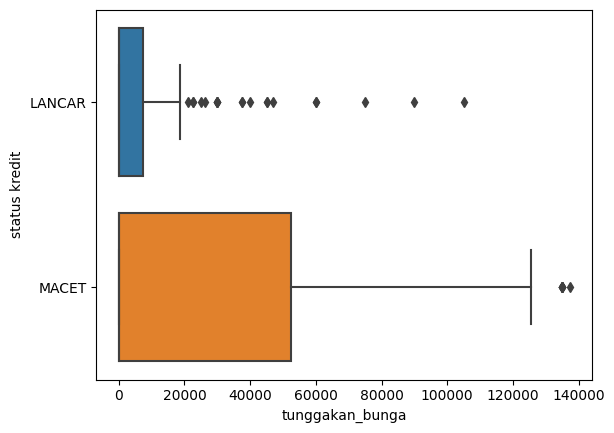

In [19]:
df_outlier_cleaned = df_miss_val_drop.copy()

# Tentukan kolom nya
columns_outlier = ['jml_pinjaman',
                   'jkw',
                   'jml_angsuran_per_bulan',
                   'jenis_pinjaman',
                   'saldo_nominatif',
                   'tunggakan_pokok',
                   'tunggakan_bunga']

for col in columns_outlier:
  Q1 = df_outlier_cleaned[col].quantile(0.25)
  Q3 = df_outlier_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1  # IQR is interquartile range.

  # Menggunakan operator bitwise & untuk menggabungkan kondisi
  DfNoOutliers = df_outlier_cleaned[~((df_outlier_cleaned[col] < Q1 - 1.5 * IQR) | (df_outlier_cleaned[col] > Q3 + 1.5 * IQR))]

  # Memasukkan perintah plot ke dalam loop
  p = sns.boxplot(x=col, y="status kredit", data=DfNoOutliers)
  plt.show()

In [20]:
DfNoOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            668 non-null    category
 1   jenis_kelamin           668 non-null    category
 2   umur                    651 non-null    float64 
 3   jml_pinjaman            614 non-null    float64 
 4   jkw                     668 non-null    float64 
 5   jml_angsuran_per_bulan  379 non-null    float64 
 6   type_pinjaman           668 non-null    int64   
 7   jenis_pinjaman          668 non-null    int64   
 8   bi_sektor_ekonomi       668 non-null    float64 
 9   col                     668 non-null    int64   
 10  bi_golongan_debitur     668 non-null    int64   
 11  bi_gol_penjamin         668 non-null    int64   
 12  saldo_nominatif         544 non-null    float64 
 13  tunggakan_pokok         487 non-null    float64 
 14  tunggakan_bunga         66

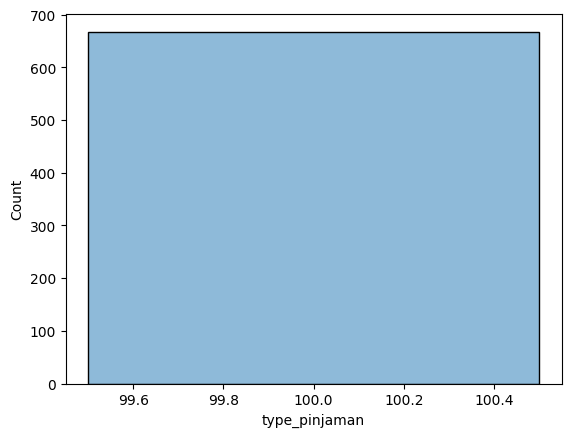

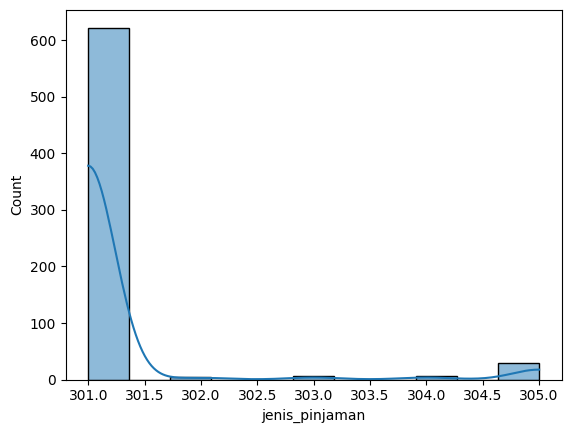

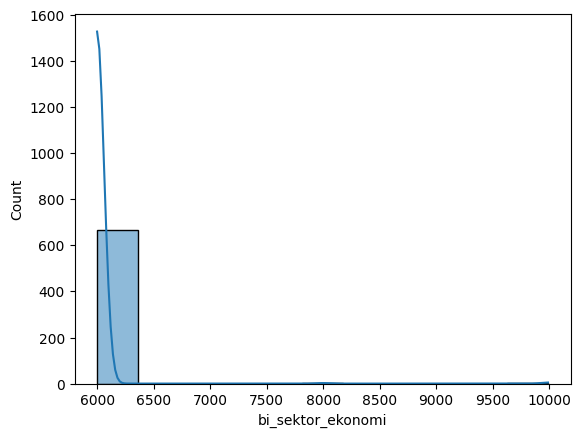

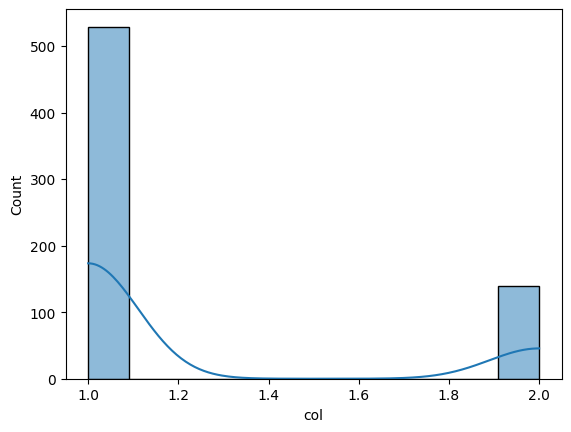

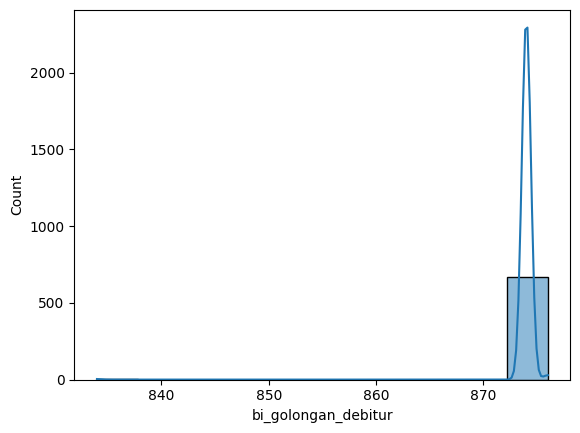

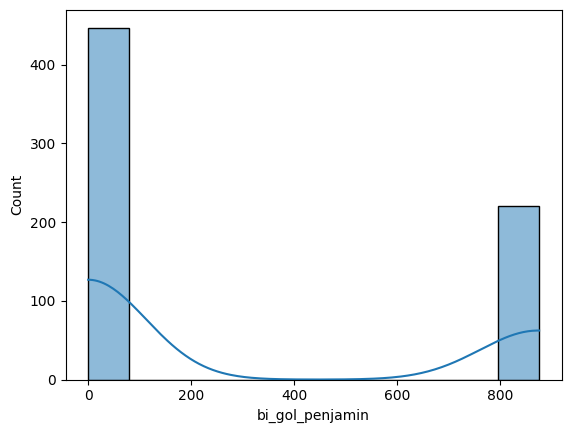

In [21]:
columns_categ = ['type_pinjaman',
                'jenis_pinjaman',
                'bi_sektor_ekonomi',
                'col',
                'bi_golongan_debitur',
                'bi_gol_penjamin']

for col in columns_categ:
    sns.histplot(data=DfNoOutliers, x=col, kde=True)
    plt.show()

# Drop Fitur yang kurang berguna

In [22]:
column_to_remove = 'bi_gol_penjamin'

if column_to_remove in columns_categ:
    columns_categ.remove(column_to_remove)


DfNoOutliers = DfNoOutliers.drop(columns_categ, axis=1)
DfNoOutliers = DfNoOutliers.drop('nama_nasabah', axis=1)

DfNoOutliers

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,P,40.0,345000.0,1.0,345000.0,875,345000.0,345000.0,0.0,MACET
1,L,31.0,350000.0,7.0,55716.0,875,390000.0,111428.0,0.0,MACET
4,P,34.0,3055499.0,8.0,NaN,875,3055499.0,NaN,0.0,MACET
7,L,27.0,4435001.0,8.0,671098.0,875,4435001.0,0.0,0.0,LANCAR
9,L,49.0,1443750.0,15.0,107800.0,875,1617000.0,1078000.0,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...
760,P,24.0,1500000.0,16.0,105000.0,0,700000.0,700000.0,90000.0,MACET
761,L,38.0,1000000.0,16.0,70000.0,0,812500.0,812500.0,97500.0,MACET
762,P,36.0,1000000.0,12.0,NaN,0,429000.0,429000.0,45000.0,MACET
764,P,31.0,1312500.0,7.0,198750.0,0,1312500.0,1312500.0,78750.0,MACET


In [23]:
for col in DfNoOutliers.columns:
    print(col,DfNoOutliers[col].unique())

jenis_kelamin ['P', 'L']
Categories (2, object): ['L', 'P']
umur [40. 31. 34. 27. 49. 42. 26. 55. 41. 35. nan 39. 50. 57. 36. 58. 43. 44.
 52. 46. 28. 48. 45. 30. 67. 32. 38. 37. 25. 29. 21. 33. 23. 19. 53. 47.
 51. 54. 61. 24. 56. 68. 60. 76. 22. 80. 65. 64.]
jml_pinjaman [  345000.   350000.  3055499.  4435001.  1443750.  3066000.  4071669.
   840000.       nan  2000000.  1000000.  4000000.   775811.   860000.
   270000.   583335.   506835.  1500000.   185169.   486000.   666667.
    90000. 10550000. 28950000.   535835.  6933332.  1116263.   610000.
  1820000.  1458339.   495000.  2040000.  1430666.   187500.  1060000.
  1400000.   145000.   124000.   603750.   200000.  1086000.   900000.
  1590000.  1200000.   875000.  1406250.  5000000.  1425000. 10000000.
   675000.  2500000.  3000000.  7000000.   800000.   500000.  3500000.
  2350000.   750000.   530000.   147667.  1600000.  2850000.   680000.
   496668.   930000.   555000.   880000.   320000.  2540000.   593334.
  2380000.   920

In [24]:
DfNoOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 765
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   jenis_kelamin           668 non-null    category
 1   umur                    651 non-null    float64 
 2   jml_pinjaman            614 non-null    float64 
 3   jkw                     668 non-null    float64 
 4   jml_angsuran_per_bulan  379 non-null    float64 
 5   bi_gol_penjamin         668 non-null    int64   
 6   saldo_nominatif         544 non-null    float64 
 7   tunggakan_pokok         487 non-null    float64 
 8   tunggakan_bunga         668 non-null    float64 
 9   status kredit           668 non-null    category
dtypes: category(2), float64(7), int64(1)
memory usage: 48.5 KB


# Data Encoding

In [25]:
encode_data = DfNoOutliers.copy()
encode_data['bi_gol_penjamin'] = encode_data['bi_gol_penjamin'].astype('object')
columns = ['bi_gol_penjamin','jenis_kelamin']
transformasi_gol = pd.get_dummies(encode_data['bi_gol_penjamin'], prefix='bi_gol_penjamin_')
transformasi_kelamin = pd.get_dummies(encode_data['jenis_kelamin'], prefix='')
encode_data = pd.concat([encode_data, transformasi_gol,transformasi_kelamin], axis = 1)
try:
    encode_data.drop(columns, axis=1, inplace=True)
except Exception as err_:
    print(err_)

print(encode_data.shape)
encode_data.head()

(668, 15)


<ipython-input-25-c9f40a9a9d88>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  transformasi_gol = pd.get_dummies(encode_data['bi_gol_penjamin'], prefix='bi_gol_penjamin_')


,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit,bi_gol_penjamin__0,bi_gol_penjamin__800,bi_gol_penjamin__835,bi_gol_penjamin__874,bi_gol_penjamin__875,_L,_P
0,40.0,345000.0,1.0,345000.0,345000.0,345000.0,0.0,MACET,0,0,0,0,1,0,1
1,31.0,350000.0,7.0,55716.0,390000.0,111428.0,0.0,MACET,0,0,0,0,1,1,0
4,34.0,3055499.0,8.0,NaN,3055499.0,NaN,0.0,MACET,0,0,0,0,1,0,1
7,27.0,4435001.0,8.0,671098.0,4435001.0,0.0,0.0,LANCAR,0,0,0,0,1,1,0
9,49.0,1443750.0,15.0,107800.0,1617000.0,1078000.0,0.0,MACET,0,0,0,0,1,1,0


In [28]:
# Saving the preprocessed Data for future use/analysis
final_data = encode_data.copy()
final_data.to_csv("/content/drive/MyDrive/Asesmen Data Science/Data_PreProcessed.csv", encoding='utf8', index=False)